# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot this time series data. 

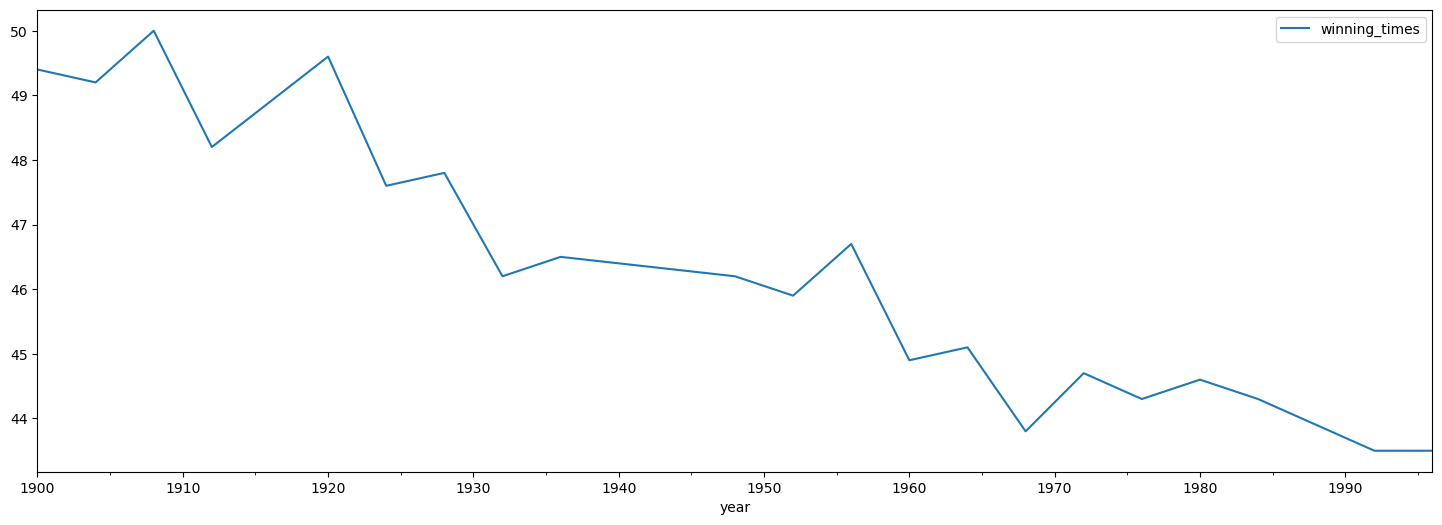

In [3]:
# Plot the time series
data.plot(figsize=(18,6));

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff(periods=1).dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

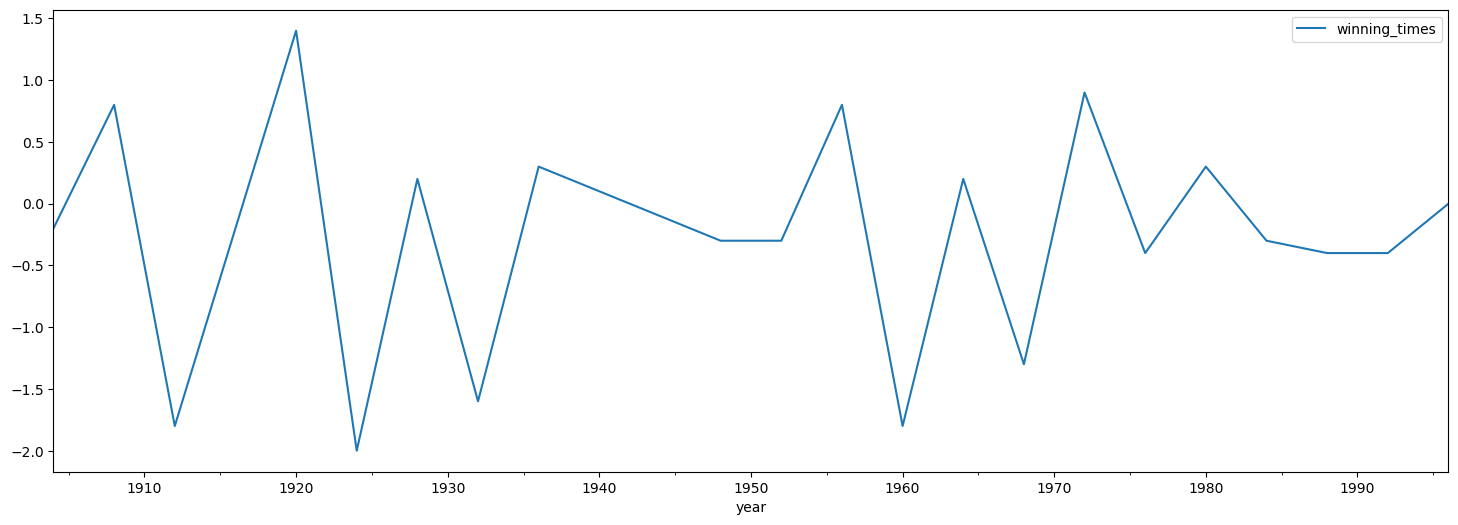

In [5]:
# Check whether lag-1 differencing has removed the linear trend
data_diff.plot(figsize=(18,6));

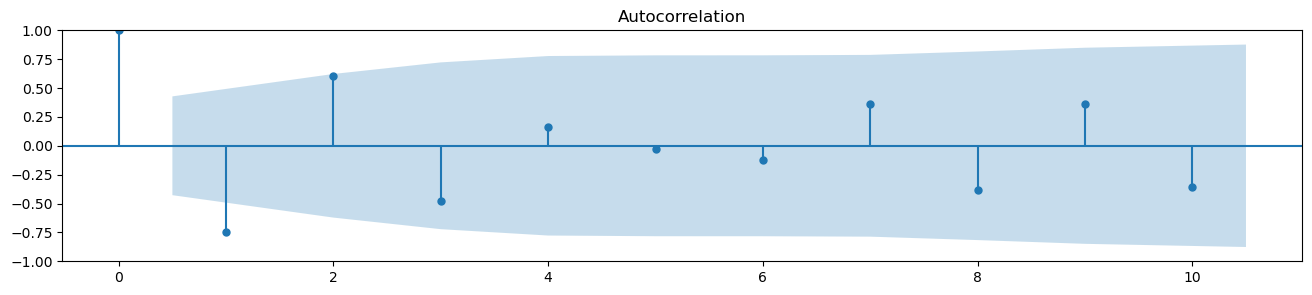

In [6]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(data_diff, ax=ax, lags=10);

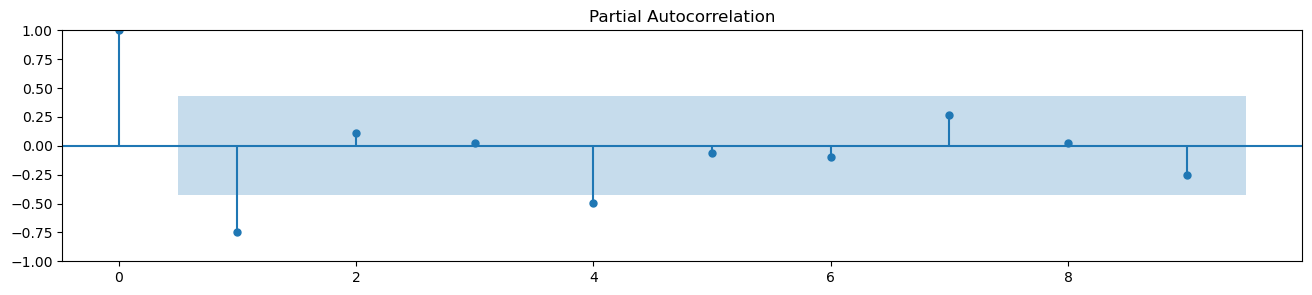

In [7]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(data_diff, ax=ax, lags=9, method="ywm");

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [9]:
# The PACF plot cuts off at lag-1 and I'll therefore first fit an ARMA(1,0) model 
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Instantiate an ARMA(1,0) model to the differenced data
mod_arma = ARIMA(data_diff, order=(1,0,0))

# Fit the model to data
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Sun, 12 Nov 2023   AIC                             46.107
Time:                        14:07:54   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.0

In [10]:
# The ACF plot cuts off at lag-2 but I will next fit an ARMA(0,1) model 

# Instantiate an ARMA(0,1) model to the simulated data
mod1_arma = ARIMA(data_diff, order=(0,0,1))

# Fit the model to data
res1_arma = mod1_arma.fit()

# Print out summary information on the fit
print(res1_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -22.443
Date:                Sun, 12 Nov 2023   AIC                             50.885
Time:                        14:08:51   BIC                             54.019
Sample:                    12-31-1904   HQIC                            51.565
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3053      0.059     -5.201      0.000      -0.420      -0.190
ma.L1         -0.7390      0.282     -2.620      0.009      -1.292      -0.186
sigma2         0.4780      0.214      2.232      0.0

In [11]:
# I will next fit an ARMA(0, 2) model 

# Instantiate an ARMA(0,2) model to the simulated data
mod2_arma = ARIMA(data_diff, order=(0,0,2))

# Fit the model to data
res2_arma = mod2_arma.fit()

# Print out summary information on the fit
print(res2_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 -21.016
Date:                Sun, 12 Nov 2023   AIC                             50.032
Time:                        14:09:21   BIC                             54.211
Sample:                    12-31-1904   HQIC                            50.939
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2538      0.235     -1.080      0.280      -0.714       0.207
ma.L1         -0.1654     60.264     -0.003      0.998    -118.280     117.949
ma.L2          0.9999    728.876      0.001      0.9

In [12]:
# I will next fit an ARMA(1,2) model 

# Instantiate an ARMA(1,2) model to the simulated data
mod3_arma = ARIMA(data_diff, order=(1,0,2))

# Fit the model to data
res3_arma = mod3_arma.fit()

# Print out summary information on the fit
print(res3_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -19.076
Date:                Sun, 12 Nov 2023   AIC                             48.152
Time:                        14:44:42   BIC                             53.374
Sample:                    12-31-1904   HQIC                            49.285
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2784      0.154     -1.811      0.070      -0.580       0.023
ar.L1         -0.4716      0.256     -1.842      0.065      -0.973       0.030
ma.L1         -0.0097      0.267     -0.036      0.9

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here
print(""" In the separate AR(1) and MA(1) models, the p values are much less than a statistical significance level of
0.05. 

The MA(2) and ARMA(1,2) models have parameters that are not statistically significant.

Since the time series is short, it's better to go for fewer parameters and therefore, I choose AR(1) as the 
best model.
""")

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 